# Matrix stress test

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext nb_black
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = [9, 5]

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## 500 room, 2 active users per room, 10 messages per user
### 2xCPU, 2xGB Ram, 256xMB swap

Файл `message.log` содержит отрезки времени которые понадобились для отправки 20-ти сообщений пользователям в чате 1 на 1.

### 400 parallel connections limit

In [11]:
data_messages_400 = pd.read_csv(
    "../test_results/400_threads/message.log", names=["time"]
)
data_messages_400 = data_messages_400.apply(lambda x: x / 10 ** 9, axis=1)

<IPython.core.display.Javascript object>

In [12]:
data_messages_400.describe()

,time
count,1000.000000
mean,61.277454
std,14.630397
min,22.210420
25%,58.826620
50%,66.525873
75%,69.943045
max,89.225849


<IPython.core.display.Javascript object>

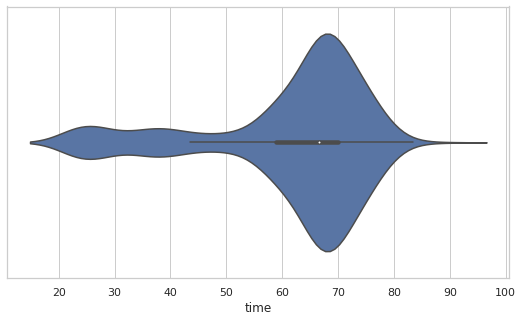

<IPython.core.display.Javascript object>

In [13]:
ax = sns.violinplot(x="time", hue="time", data=data_messages_400, scale="count")

In [14]:
data_messages_400_per_sec = pd.read_csv(
    "../test_results/400_threads/message_per_sec.log", names=["time"]
)
data_messages_400_per_sec = data_messages_400_per_sec.apply(
    lambda x: x / 10 ** 9, axis=1
)

<IPython.core.display.Javascript object>

In [15]:
data_messages_400_per_sec.describe()

,time
count,2.220000e+02
mean,4.503604e-08
std,2.777591e-08
min,0.000000e+00
25%,2.900000e-08
50%,3.800000e-08
75%,7.000000e-08
max,1.100000e-07


<IPython.core.display.Javascript object>

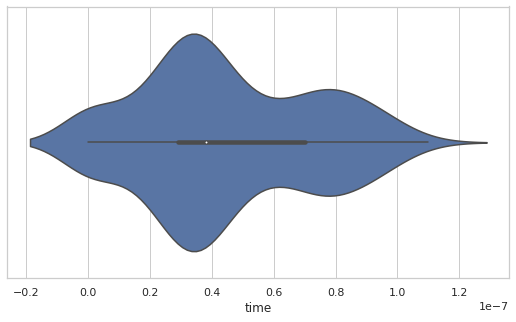

<IPython.core.display.Javascript object>

In [16]:
ax = sns.violinplot(x="time", hue="time", data=data_messages_400_per_sec, scale="count")

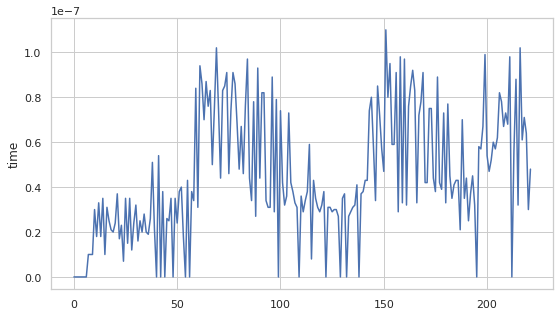

<IPython.core.display.Javascript object>

In [17]:
ax = sns.lineplot(data=data_messages_400_per_sec["time"])

### 200 parallel connections limit

In [18]:
data_messages_200 = pd.read_csv(
    "../test_results/200_threads/message.log", names=["time"]
)
data_messages_200 = data_messages_200.apply(lambda x: x / 10 ** 9, axis=1)

<IPython.core.display.Javascript object>

In [19]:
data_messages_200.describe()

,time
count,1000.000000
mean,33.208262
std,4.071975
min,18.522411
25%,32.889054
50%,34.275568
75%,35.571569
max,38.414008


<IPython.core.display.Javascript object>

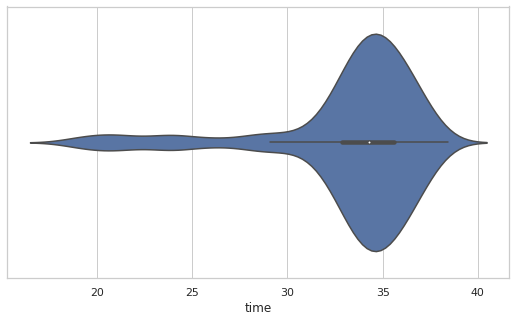

<IPython.core.display.Javascript object>

In [20]:
ax = sns.violinplot(x="time", hue="time", data=data_messages_200, scale="count")

### 100 parallel connections limit

In [30]:
data_messages_100_per_sec = pd.read_csv(
    "../test_results/100_threads/message_per_sec.log", names=["time"]
)
data_messages_100_per_sec = data_messages_100_per_sec.apply(
    lambda x: x / 10 ** 9, axis=1
)

<IPython.core.display.Javascript object>

In [31]:
data_messages_100_per_sec.describe()

,time
count,2.150000e+02
mean,4.646977e-08
std,2.094179e-08
min,0.000000e+00
25%,3.000000e-08
50%,4.600000e-08
75%,6.300000e-08
max,9.400000e-08


<IPython.core.display.Javascript object>

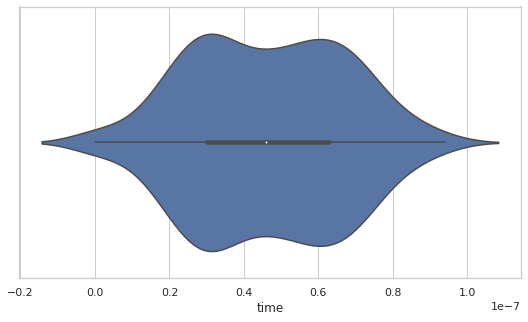

<IPython.core.display.Javascript object>

In [32]:
ax = sns.violinplot(x="time", hue="time", data=data_messages_100_per_sec, scale="count")

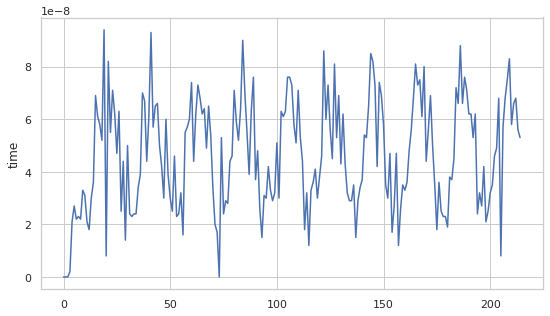

<IPython.core.display.Javascript object>

In [33]:
ax = sns.lineplot(data=data_messages_100_per_sec["time"])

### 50 parallel connections limit

In [21]:
data_messages_50 = pd.read_csv("../test_results/50_threads/message.log", names=["time"])
data_messages_50 = data_messages_50.apply(lambda x: x / 10 ** 9, axis=1)

<IPython.core.display.Javascript object>

In [22]:
data_messages_50.describe()

,time
count,1000.000000
mean,9.437868
std,0.895555
min,5.318904
25%,8.974612
50%,9.549423
75%,9.954157
max,11.491048


<IPython.core.display.Javascript object>

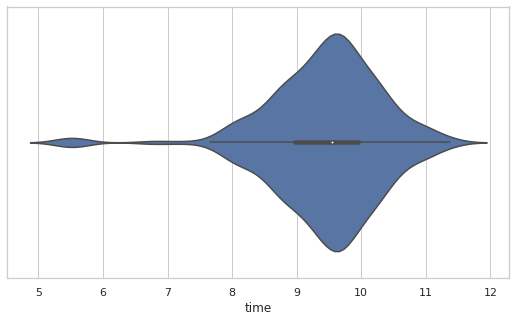

<IPython.core.display.Javascript object>

In [23]:
ax = sns.violinplot(x="time", hue="time", data=data_messages_50, scale="count")

In [24]:
data_messages_50_per_sec = pd.read_csv(
    "../test_results/50_threads/message_per_sec.log", names=["time"]
)
data_messages_50_per_sec = data_messages_50_per_sec.apply(lambda x: x / 10 ** 9, axis=1)

<IPython.core.display.Javascript object>

In [25]:
data_messages_50_per_sec.describe()

,time
count,2.290000e+02
mean,4.358952e-08
std,1.972791e-08
min,0.000000e+00
25%,2.700000e-08
50%,4.600000e-08
75%,6.200000e-08
max,8.600000e-08


<IPython.core.display.Javascript object>

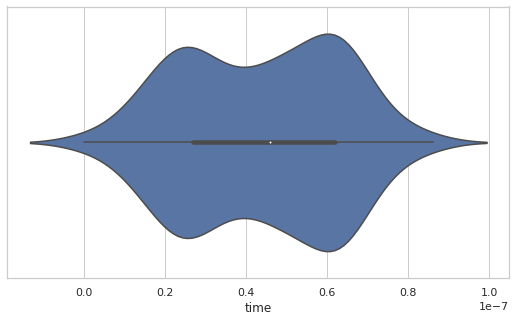

<IPython.core.display.Javascript object>

In [26]:
ax = sns.violinplot(x="time", hue="time", data=data_messages_50_per_sec, scale="count")

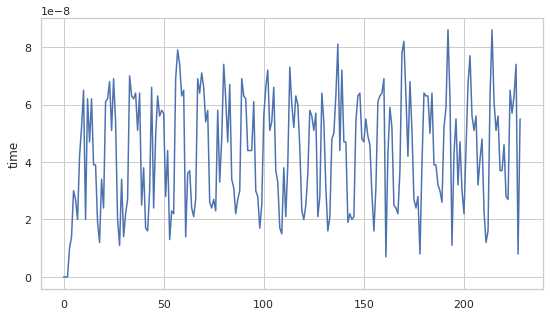

<IPython.core.display.Javascript object>

In [27]:
ax = sns.lineplot(data=data_messages_50_per_sec["time"])

### Наблюдения

В среднем потребление RAM находилось около 700MB, СPU был полностью загружен. К концу теста SWAP был полностью использован. Редко наблюдались ошибки PostgresQL связанные с слишком большим количеством желающих сделать операцию UPDATE:
```
ERROR:  could not serialize access due to concurrent update
UPDATE pushers SET last_stream_ordering = 1712
```

Однако при длительном спаме, переодически были просадки скорости отправки связанные с резким скачком нагрузки postgres. Процесс базы данных получал порядка 100% одного ядра в течении 10-15 секунд, затем снова потребялл порядка 5%.

Максимальным активным числом спамящих юзеров оказалось ~750 параллельных подключений. Но нужно учесть, что все механизмы защиты от спама и dos были выключены, в противном случае, после 3-5 сообщений с такой скоростью, метод посылки собщения бы вернул ошибку, что превышен лимит запросов.

**Вывод:** тест нельзя считать очень честным, так как были воссозданы не продакшн условия, выключены все меры защиты, плюс сложно понять, было ли узким местом сетевой тракт, может роутер или сетевая карта не позволяла слать быстрее и больше. Если же этим пренебречь, то результат в ~750 активных пользователей можно смело умножать на 3-5.


### Screenshot proof


<img src="./photo_2020-10-01_20-23-44.jpg" width="300">